In [1]:
from sklearn import neighbors, metrics
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve

## Functions required for KNN classification

In [2]:
def knn_train(X, y, metric='minkowski', n_neighbors=5):
    knn = neighbors.KNeighborsClassifier(metric=metric, n_neighbors=n_neighbors)
    knn.fit(X, y)
    return knn

In [3]:
def get_classification_score(dt, X, y):
    return dt.score(X, y)

def get_f1_score(dt, X, y, average='macro'):
    yp = dt.predict(X)
    return metrics.f1_score(y, yp, average=average)

In [4]:
def plot_validation_curve(X, y, param_name, param_range, cross_validation=5, fig_name="validation_curve.png",
                          xscale='linear', metric='minkowski', scorer=None):
    knn = neighbors.KNeighborsClassifier(metric=metric)
    tr_sc, tst_sc = model_selection.validation_curve(knn, X, y, param_name=param_name,
                                                            param_range=param_range, cv=cross_validation, scoring=scorer)
    plt.figure()
    plt.xticks(param_range)
    plt.xlabel(param_name)
    plt.xscale(xscale)
    plt.ylabel("Score")
    plt.plot(param_range, np.mean(tr_sc, axis=1), label='Training score')
    plt.plot(param_range, np.mean(tst_sc, axis=1), label='Cross-validation score')
    plt.legend(loc="best")
    plt.title('KNN - Validation Curve Metric - {}'.format(metric))
    
    plt.savefig(fig_name)
    plt.show()
    

## Phishing Websites dataset analysis

In [5]:
from scipy.io.arff import loadarff 

raw_data = loadarff('Training Dataset.arff')
ph_data = pd.DataFrame(raw_data[0])
ph_data.head()

for var in ph_data.columns.values:
    ph_data[var] = pd.Categorical(ph_data[var])
    ph_data[var] = ph_data[var].cat.codes

<AxesSubplot:xlabel='Result', ylabel='count'>

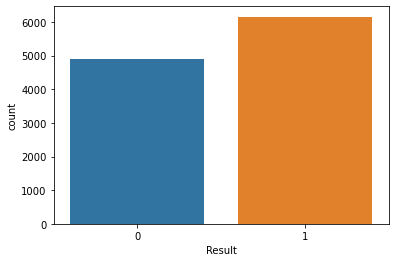

In [6]:
sns.countplot(x="Result", data=ph_data)

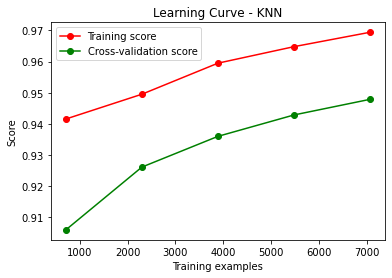

In [10]:
y = ph_data.Result.values
X = ph_data.drop(['Result'], axis=1)
fig, ax = plt.subplots()
ax.set_title("Learning Curve - KNN")
ax.set_xlabel("Training examples")
ax.set_ylabel("Score")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
knn = knn_train(X_train, y_train)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(knn, X_train, y_train, cv=5,
                       return_times=True)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
ax.legend(loc="best")

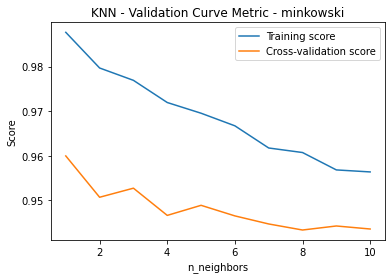

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
plot_validation_curve(X_train, y_train, 'n_neighbors', range(1, 11, 1), 
                      fig_name="max_depth_vc.png")

In [13]:
knn = knn_train(X_train, y_train, n_neighbors=1)
print("Score:", get_classification_score(knn, X_test, y_test))

Score: 0.9674355495251018


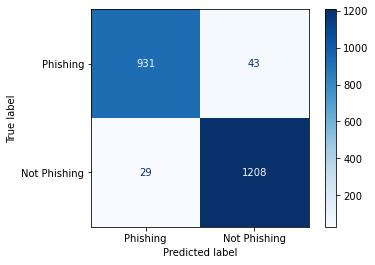

In [14]:
plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=['Phishing', 'Not Phishing'],
                                 cmap=plt.cm.Blues)
plt.show()

In [15]:
import pickle
pickle.dump(knn, open("KNN K=1 dataset2.sav", 'wb'))

## Census Dataset Analysis

In [16]:
data = pd.read_csv("adult.data", sep='\t', header=None, 
                   names=["age", "workclass", "fnlwgt", "education", 
                          "education-num", "marital-status", "occupation",
                          "relationship", "race", "sex", "capital-gain", 
                          "capital-loss", "hours-per-week", "native-country", 
                          "output"])
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<AxesSubplot:xlabel='output', ylabel='count'>

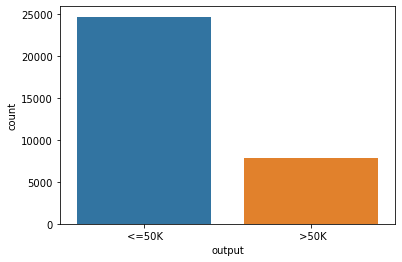

In [17]:
sns.countplot(x="output", data=data)

Class imbalance at play

In [18]:
categorical_vars =["workclass", "education", "marital-status", "occupation", "relationship", 
                   "race", "sex", "native-country"]
df = data.copy()
for var in categorical_vars:
    df[var] = pd.Categorical(df[var])
    df[var] = df[var].cat.codes

continuous_vars = ["fnlwgt", "capital-gain", "capital-loss"]
for var in continuous_vars:
    df[var] = (df[var]-df[var].mean())/df[var].std()

normalized_df=(df-df.mean())/df.std()
y = df.output.values
X = df.drop(['output'], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,39,7,-1.063594,9,13,4,1,1,4,1,0.148451,-0.216656,40,39,<=50K
1,50,6,-1.008692,9,13,2,4,0,4,1,-0.145918,-0.216656,13,39,<=50K
2,38,4,0.245075,11,9,0,6,1,4,1,-0.145918,-0.216656,40,39,<=50K
3,53,4,0.425795,1,7,2,6,0,2,1,-0.145918,-0.216656,40,39,<=50K
4,28,4,1.408154,9,13,2,10,5,2,0,-0.145918,-0.216656,40,5,<=50K


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
knn = knn_train(X_train, y_train)

In [20]:
print("Score:", get_classification_score(knn, X_test, y_test))
print("F1-Score (Macro):",get_f1_score(knn, X_test, y_test))

Score: 0.7965607247044373
F1-Score (Macro): 0.7079167079167079


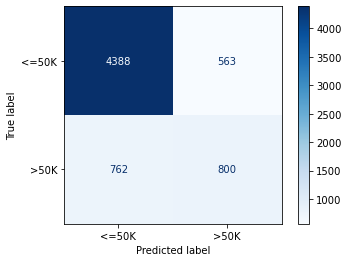

In [21]:
plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=['<=50K', '>50K'],
                                 cmap=plt.cm.Blues)
plt.show()

This model doesn't perform so well on the population that have >50K as their income. It is important for us to plot the learning curve and check if this is a high bias or a high variance problem.

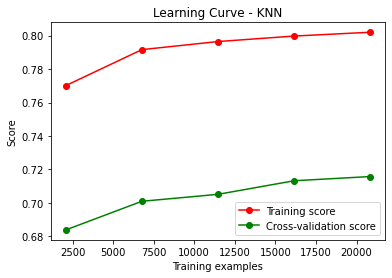

In [22]:
fig, ax = plt.subplots()
ax.set_title("Learning Curve - KNN")
ax.set_xlabel("Training examples")
ax.set_ylabel("Score")

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(knn, X_train, y_train, cv=5,
                       return_times=True, scoring=lambda dt, x, y: get_f1_score(dt, x, y))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
ax.legend(loc="best")

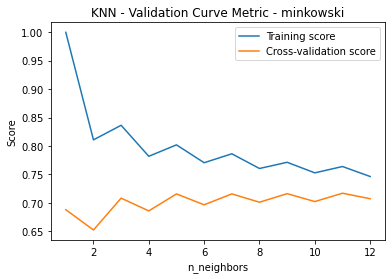

In [23]:
plot_validation_curve(X_train, y_train, 'n_neighbors', range(1, 13, 1), 
                      fig_name="max_depth_vc.png", scorer=lambda knn, x, y: get_f1_score(knn, x, y))

Let us choose k=5 and Minkowski distance metric.

In [24]:
knn_f = knn_train(X_train, y_train, n_neighbors=5)

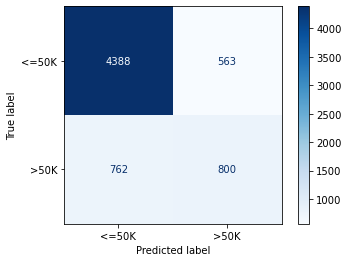

In [25]:
plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=['<=50K', '>50K'],
                                 cmap=plt.cm.Blues)
plt.show()

In [26]:
print("Score:", get_classification_score(knn, X_test, y_test))
print("F1 Score (Macro):", get_f1_score(knn, X_test, y_test))

Score: 0.7965607247044373
F1 Score (Macro): 0.7079167079167079


In [27]:
import pickle
pickle.dump(knn, open("KNN K=5 dataset1.sav", 'wb'))